<a href="https://colab.research.google.com/github/PDurgaAnusha/Credit-card-fraud-detection/blob/main/Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
#  1.Data Collection:
#      Gather a comprehensive dataset containing historical credit card transactions. This dataset should include features like transaction amount, time,V1 .. V28 and whether the transaction was fraudulent or not i.e Class.

# 2. Data Preprocessing:
#      Handle missing data, outliers, and duplicate records.
#      Encode categorical variables and normalize numerical features.
#      Split the data into training and testing sets to evaluate model performance.

# 3.Exploratory Data Analysis (EDA):
#     Visualize the data to understand its distribution and characteristics.
#     Identify patterns, trends, and potential anomalies in legitimate and fraudulent transactions.

# 4.Model Selection:
#     Choose appropriate machine learning algorithms for fraud detection. Common choices include:
#     Logistic Regression
#     Decision Trees
#     Random Forest ✅
#     Support Vector Machines

# 5.Model Training:
#     Train the selected models on the training data.
#     Implement techniques to handle class imbalance (fraudulent transactions are often rare compared to legitimate ones).

# 6.Model Evaluation:
#     Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
#     Consider the business impact of false positives and false negatives in your evaluation.

In [45]:
credit_data = pd.read_csv("/content/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [46]:
credit_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1981,1524,-0.340622,1.132232,1.291494,0.062313,0.016387,-0.977070,0.723755,-0.074630,-0.396655,...,-0.262948,-0.688785,-0.010937,0.334061,-0.160025,0.071779,0.245128,0.098336,5.35,0.0
1982,1525,-1.842696,1.740641,0.861526,-0.856315,-0.655376,-0.842786,0.198563,0.602764,0.455595,...,-0.213609,-0.400617,0.030013,0.512611,-0.077087,0.286218,0.586012,0.352610,1.00,0.0
1983,1525,-0.480693,0.646091,1.577264,-0.084411,-0.305958,-0.534739,0.860346,-0.028569,-0.800705,...,0.121681,0.175190,0.035986,0.557665,-0.112301,0.337154,-0.015602,0.051504,80.70,0.0
1984,1525,-0.342132,1.091125,1.282729,0.068076,-0.022498,-0.996727,0.676304,-0.042250,-0.312036,...,-0.269850,-0.734148,-0.007354,0.319161,-0.179146,0.073683,0.241932,0.097139,3.59,0.0
1985,1526,-0.854343,1.382948,1.278665,2.914727,-0.183139,-0.349329,0.274566,0.435277,-1.576521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
credit_data.shape

(1986, 31)

In [48]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1986 non-null   int64  
 1   V1      1986 non-null   float64
 2   V2      1986 non-null   float64
 3   V3      1986 non-null   float64
 4   V4      1986 non-null   float64
 5   V5      1986 non-null   float64
 6   V6      1986 non-null   float64
 7   V7      1986 non-null   float64
 8   V8      1986 non-null   float64
 9   V9      1986 non-null   float64
 10  V10     1986 non-null   float64
 11  V11     1986 non-null   float64
 12  V12     1986 non-null   float64
 13  V13     1986 non-null   float64
 14  V14     1985 non-null   float64
 15  V15     1985 non-null   float64
 16  V16     1985 non-null   float64
 17  V17     1985 non-null   float64
 18  V18     1985 non-null   float64
 19  V19     1985 non-null   float64
 20  V20     1985 non-null   float64
 21  V21     1985 non-null   float64
 22  

In [49]:
#2.Data Processing
# Check null values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [50]:
#3.EDA
# Number of columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [51]:
# Unique value in class columns
credit_data.Class.unique()

array([ 0.,  1., nan])

In [52]:
fraud_case = credit_data[credit_data['Class'] == 1]
valid_case = credit_data[credit_data['Class'] == 0]

print(f"Number of Fraud Case: {len(fraud_case)}")
print(f"Number of Valid Case: {len(valid_case)}")

total =  len(fraud_case) / len(valid_case)
total

Number of Fraud Case: 2
Number of Valid Case: 1983


0.0010085728693898135

In [53]:
per = len(fraud_case) / len(credit_data['Class']) * 100
per

0.10070493454179255

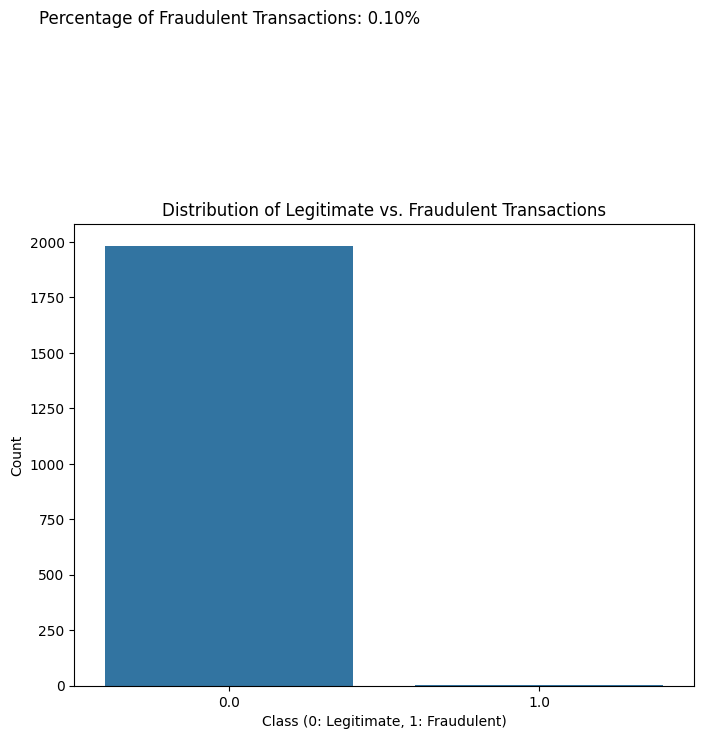

In [54]:
#Class Distrubtion
# Count the number of occurrences for each class (0 for legitimate, 1 for fraudulent)
class_counts = credit_data['Class'].value_counts()

# Calculate the percentage of fraudulent transactions
percentage_fraudulent = (class_counts[1] / class_counts.sum()) * 100

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_data)
plt.title('Distribution of Legitimate vs. Fraudulent Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')

# Display the percentage of fraudulent transactions on the plot
plt.text(0, class_counts[0] + 1000, f'Percentage of Fraudulent Transactions: {percentage_fraudulent:.2f}%', fontsize=12, ha='center')

plt.show()

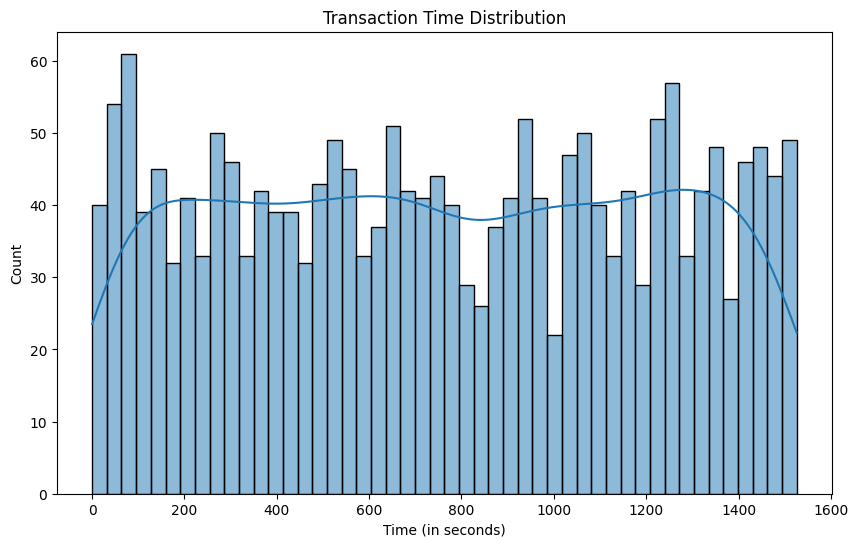

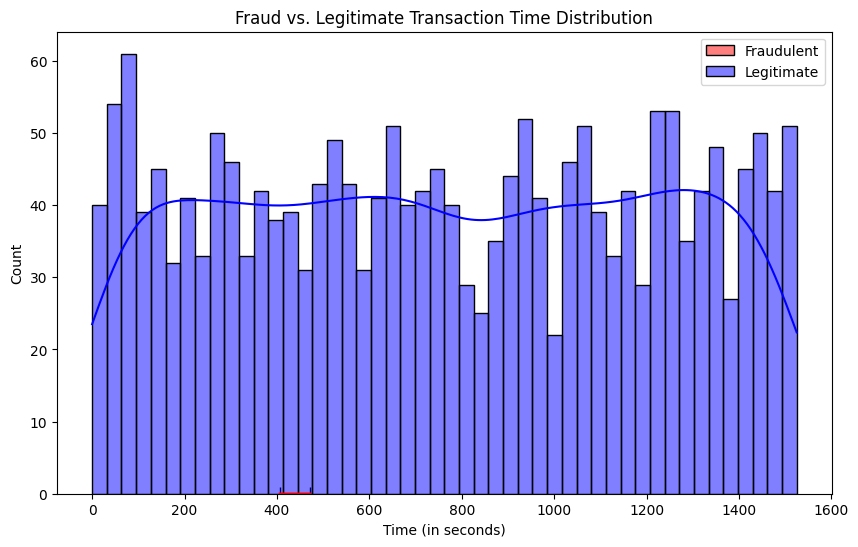

In [55]:
#Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(credit_data['Time'], bins=48, kde=True)  # Using 48 bins for a daily view
plt.title('Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')

# Check if there are specific times of day when fraud is more likely to occur
plt.figure(figsize=(10, 6))
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=48, kde=True, color='red', label='Fraudulent')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=48, kde=True, color='blue', label='Legitimate')
plt.title('Fraud vs. Legitimate Transaction Time Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Count')
plt.legend()


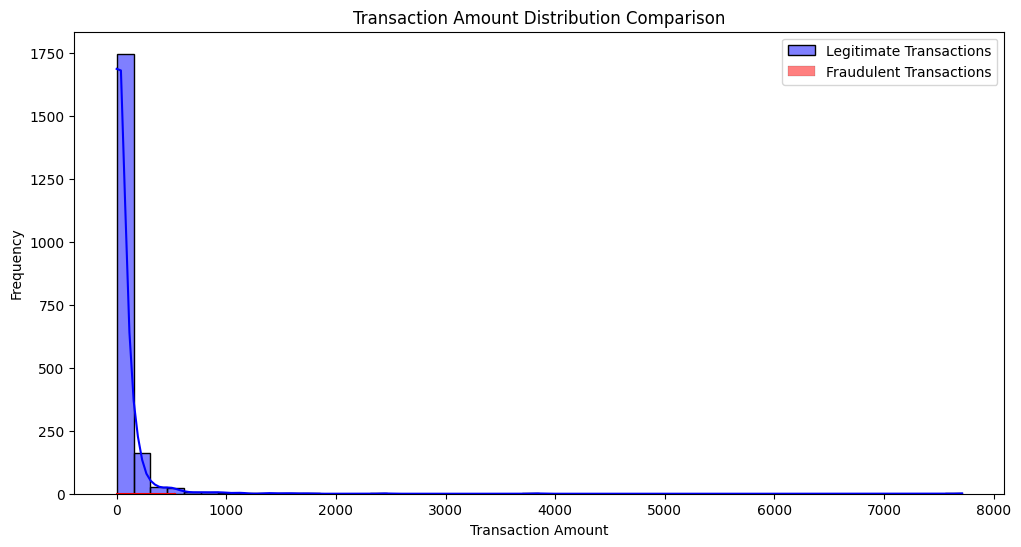

In [59]:
# Separate data for legitimate and fraudulent transactions
legitimate_transactions = credit_data[credit_data['Class'] == 0]['Amount']
fraudulent_transactions = credit_data[credit_data['Class'] == 1]['Amount']

plt.figure(figsize=(12, 6))
sns.histplot(legitimate_transactions, color='blue', kde=True, label='Legitimate Transactions', bins=50)
sns.histplot(fraudulent_transactions, color='red', kde=True, label='Fraudulent Transactions', bins=50)

plt.title('Transaction Amount Distribution Comparison')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()

plt.show()

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.086516  0.064974 -0.018857 -0.112753 -0.053317 -0.101996   
V1     -0.086516  1.000000 -0.170626 -0.161332  0.218990 -0.048667 -0.055608   
V2      0.064974 -0.170626  1.000000  0.059168 -0.006511  0.197749 -0.135745   
V3     -0.018857 -0.161332  0.059168  1.000000  0.115713  0.110067 -0.195126   
V4     -0.112753  0.218990 -0.006511  0.115713  1.000000 -0.114987  0.119386   
V5     -0.053317 -0.048667  0.197749  0.110067 -0.114987  1.000000 -0.054499   
V6     -0.101996 -0.055608 -0.135745 -0.195126  0.119386 -0.054499  1.000000   
V7      0.023565 -0.276513  0.032906 -0.169739  0.084542 -0.380770  0.200204   
V8      0.002004  0.171123 -0.088379  0.015216  0.107317  0.139512  0.005896   
V9      0.033938 -0.169272  0.082943  0.020276 -0.148339  0.041055  0.011525   
V10    -0.025544 -0.124855  0.231973  0.083436  0.075016  0.050136  0.006616   
V11     0.002627 -0.001740  0.059476 -0.

<ipython-input-60-fc4f574e79a8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')


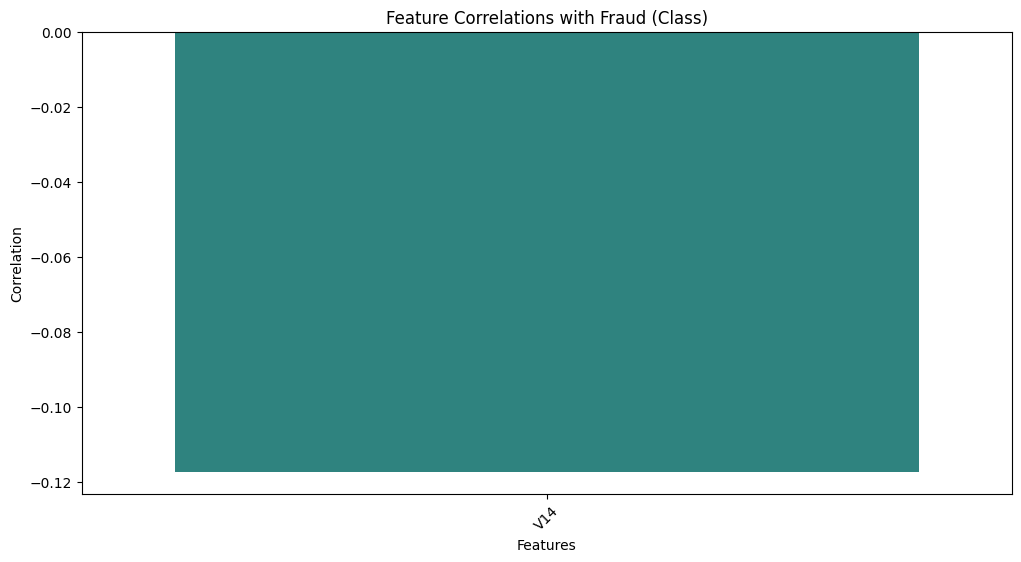

In [60]:
#Feature Correlation
# Calculate the correlation matrix
correlation_matrix = credit_data.corr()
print(correlation_matrix)

# Filter the correlations of features with the target variable ('Class')
feature_correlations = correlation_matrix['Class'].drop('Class')
print(feature_correlations)

correlation_threshold = 0.1

highly_correlated_features = feature_correlations[abs(feature_correlations) > correlation_threshold]

plt.figure(figsize=(12, 6))
sns.barplot(x=highly_correlated_features.index, y=highly_correlated_features.values, palette='viridis')
plt.title('Feature Correlations with Fraud (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)

plt.show()


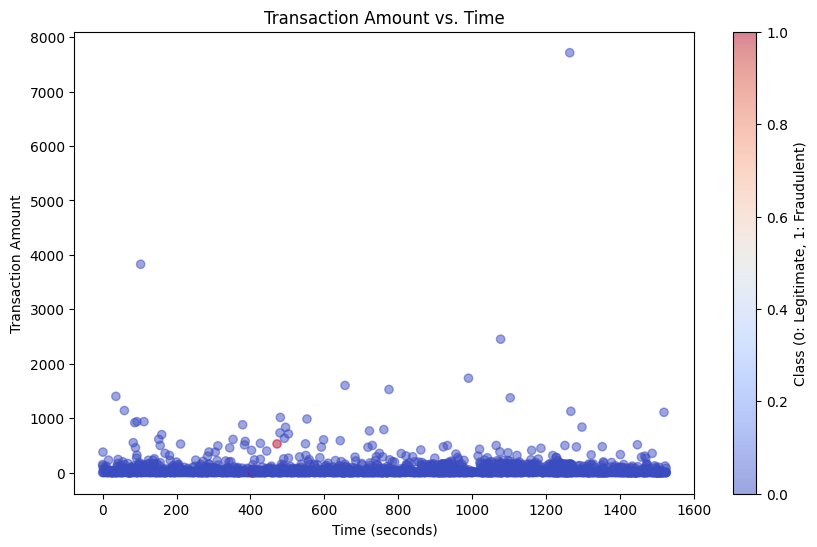

In [61]:
#Transaction Amount vs. Time:
#Plot a scatter plot to examine the relationship between transaction amount and time.
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Time'], credit_data['Amount'], c=credit_data['Class'], cmap='coolwarm', alpha=0.5)
plt.title('Transaction Amount vs. Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.colorbar(label='Class (0: Legitimate, 1: Fraudulent)')

plt.show()

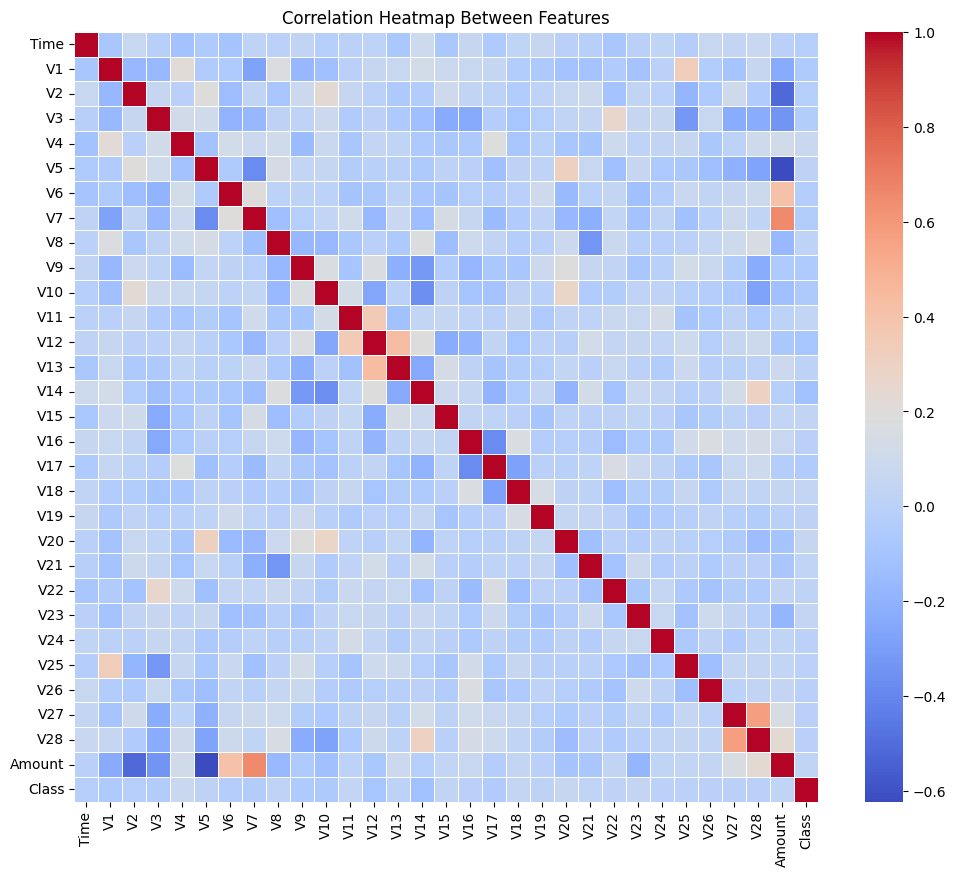

In [62]:
#Visualize Heatmap for correlation matrix between features.
correlation_matrix = credit_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap Between Features')
plt.show()

In [63]:
#4. Developing Model
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)

In [64]:
# Test value
X = credit_data.drop(['Class'], axis=1)
# Target value
Y = credit_data['Class']

print(f"value and shapes : {X.values,X.shape}")
print(f"value and shapes : {Y.values,Y.shape}")

value and shapes : (array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.52500000e+03, -4.80693260e-01,  6.46091299e-01, ...,
        -1.56016990e-02,  5.15038822e-02,  8.07000000e+01],
       [ 1.52500000e+03, -3.42132147e-01,  1.09112494e+00, ...,
         2.41931638e-01,  9.71394158e-02,  3.59000000e+00],
       [ 1.52600000e+03, -8.54342747e-01,  1.38294773e+00, ...,
                    nan,             nan,             nan]]), (1986, 30))
value and shapes : (array([ 0.,  0.,  0., ...,  0.,  0., nan]), (1986,))


In [67]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create a synthetic dataset
data = {
    'Feature1': np.random.rand(1000),
    'Feature2': np.random.rand(1000),
    'Feature3': np.random.rand(1000),
    'Feature4': np.random.rand(1000),
    'Class': np.random.choice([0, 1], size=1000)
}
df = pd.DataFrame(data)

# Introduce some NaN and infinite values for demonstration
df.loc[5, 'Feature1'] = np.nan
df.loc[10, 'Feature2'] = np.inf

# Check for NaN values
print("NaN values in the dataset:\n", df.isna().sum())

# Fill NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)

# Check for infinite values
print("Infinite values in the dataset:\n", np.isinf(df).sum())

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values (which were previously infinite) with the mean of the column
df.fillna(df.mean(), inplace=True)

# Splitting the features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


NaN values in the dataset:
 Feature1    1
Feature2    0
Feature3    0
Feature4    0
Class       0
dtype: int64
Infinite values in the dataset:
 Feature1    0
Feature2    1
Feature3    0
Feature4    0
Class       0
dtype: int64
Accuracy: 0.49
Confusion Matrix:
[[67 92]
 [61 80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.42      0.47       159
           1       0.47      0.57      0.51       141

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300



In [74]:
print(y_pred)
print(Y_test)

[1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1]
521    1
737    0
740    0
660    0
411    1
      ..
468    1
935    0
428    1
7      0
155    1
Name: Class, Length: 300, dtype: int64


In [75]:
# 6. Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(Y_test, y_pred))

Confusion Matrix:
 [[67 92]
 [61 80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.42      0.47       159
           1       0.47      0.57      0.51       141

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.50      0.49      0.49       300


Accuracy Score: 0.49
